https://coinmarketcap.com/coins/

In [3]:
from bs4 import BeautifulSoup
import requests

url = 'https://coinmarketcap.com/currencies/bitcoin/'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html')

<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no, shrink-to-fit=no" name="viewport"/>
  <script>
   (function() {var isInApp = navigator.userAgent.match(/CMCApp/i);if (!isInApp && !window.oneTrustScriptLoad) {window.oneTrustScriptLoad = true;document.write('<scr'+'ipt src="https://cdn.cookielaw.org/scripttemplates/otSDKStub.js" type="text/javascript" charset="UTF-8" data-domain-script="13729615-a271-4a5f-8eae-0c058b458464"></sc'+'ript><scr'+'ipt type="text/javascript"> function OptanonWrapper() {} </sc'+'ript>');}
})()
  </script>
  <script>
   (function() {if (false) {window.__renderTime__.csrRender = 1704151935783;return;}window.__renderTime__ = {"pageInitStart":1704151935756,"pageInitEnd":1704151935780,"pageRender":1704151935783};window.__renderTime__.pageLoad = Date.now();})()
  </script>
  <script>
   (function
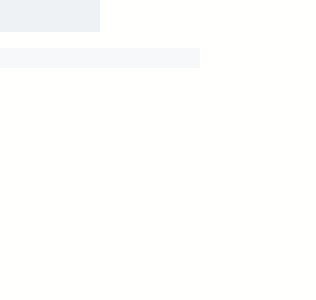

In [4]:
print(soup.prettify())

In [ ]:
<span data-role="coin-name" title="Bitcoin" 
class="sc-f70bb44c-0 jltoa">Bitcoin<span class="sc-f70bb44c-0 iQEJet coin-name-mobile"> price</span>&nbsp;</span>

In [23]:
soup.find('span', class_ = 'sc-f70bb44c-0 jltoa')

<span class="sc-f70bb44c-0 jltoa" data-role="coin-name" title="Bitcoin">Bitcoin<span class="sc-f70bb44c-0 iQEJet coin-name-mobile"> price</span> </span>

In [24]:
crypto_name = soup.find('span', class_ = 'sc-f70bb44c-0 jltoa').text.split(' ')
crypto_name

['Bitcoin', 'price\xa0']

In [27]:
crypto_name = soup.find('span', class_ = 'sc-f70bb44c-0 jltoa').text.split(' ')[0]
crypto_name

'Bitcoin'

In [ ]:
<span class="sc-f70bb44c-0 jxpCgO base-text">$45,126.09</span>

In [28]:
soup.find('span', class_="sc-f70bb44c-0 jxpCgO base-text")

<span class="sc-f70bb44c-0 jxpCgO base-text">$43,998.84</span>

In [29]:
soup.find('span', class_="sc-f70bb44c-0 jxpCgO base-text").text

'$43,998.84'

In [30]:
crypto_price = soup.find('span', class_="sc-f70bb44c-0 jxpCgO base-text").text
crypto_price.replace('$','')

'43,998.84'

In [31]:
final_price = crypto_price.replace('$','')
final_price

'43,998.84'

In [32]:
import pandas as pd

In [49]:
from datetime import datetime

date_time = datetime.now()

dict = {'Crypto Name': crypto_name,
       'Price': final_price,
       'TimeStamp': datetime.now()
}

df = pd.DataFrame([dict])
df

,Crypto Name,Price,TimeStamp
0,Bitcoin,"43,998.84",2024-01-01 19:10:29.957602


In [50]:
path = r'C:\Users\dlam1\Analyst Builder\Python Programming for Beginners\Projects\Crypto Web Puller\\'
df.to_csv(path + r'Crypto_Automated_Pull.csv')

In [51]:
import os

In [55]:
if os.path.exists(path + r'Crypto_Automated_Pull.csv'):
    df.to_csv(path + r'Crypto_Automated_Pull.csv', mode = 'a', header = False, index = False)
else:
    df.to_csv(path + r'Crypto_Automated_Pull.csv')

# Let's put it all together

In [57]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import os
from datetime import datetime

url = 'https://coinmarketcap.com/currencies/bitcoin/'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html')

crypto_name = soup.find('span', class_ = 'sc-f70bb44c-0 jltoa').text.split(' ')[0]

crypto_price = soup.find('span', class_="sc-f70bb44c-0 jxpCgO base-text").text
final_price = crypto_price.replace('$','')

date_time = datetime.now()

dict = {'Crypto Name': crypto_name,
       'Price': final_price,
       'TimeStamp': datetime.now()
}

df = pd.DataFrame([dict])

if os.path.exists(path + r'Crypto_Automated_Pull.csv'):
    df.to_csv(path + r'Crypto_Automated_Pull.csv', mode = 'a', header = False, index = False)
else:
    df.to_csv(path + r'Crypto_Automated_Pull.csv')

In [ ]:
# Now, we will automate this

In [59]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import os
from datetime import datetime
import time

In [63]:
def automated_crypto_pull():
    url = 'https://coinmarketcap.com/currencies/bitcoin/'
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html')

    crypto_name = soup.find('span', class_ = 'sc-f70bb44c-0 jltoa').text.split(' ')[0]

    crypto_price = soup.find('span', class_="sc-f70bb44c-0 jxpCgO base-text").text
    final_price = crypto_price.replace('$','')

    date_time = datetime.now()

    dict = {'Crypto Name': crypto_name,
           'Price': final_price,
           'TimeStamp': datetime.now()
    }

    df = pd.DataFrame([dict])

    if os.path.exists(path + r'Crypto_Automated_Pull.csv'):
        df.to_csv(path + r'Crypto_Automated_Pull.csv', mode = 'a', header = False, index = False)
    else:
        df.to_csv(path + r'Crypto_Automated_Pull.csv', index = False)
        
    print(df)

In [64]:
while True:
    automated_crypto_pull()
    time.sleep(20)

  Crypto Name      Price                  TimeStamp
0     Bitcoin  45,363.56 2024-01-01 19:29:56.835873
  Crypto Name      Price                  TimeStamp
0     Bitcoin  45,363.56 2024-01-01 19:30:17.077772
  Crypto Name      Price                  TimeStamp
0     Bitcoin  45,363.56 2024-01-01 19:30:37.343616
  Crypto Name      Price                  TimeStamp
0     Bitcoin  45,363.56 2024-01-01 19:30:57.588841
  Crypto Name      Price                  TimeStamp
0     Bitcoin  45,363.56 2024-01-01 19:31:17.828709
  Crypto Name      Price                  TimeStamp
0     Bitcoin  45,326.89 2024-01-01 19:31:38.046948
  Crypto Name      Price                  TimeStamp
0     Bitcoin  45,326.89 2024-01-01 19:31:58.253307


KeyboardInterrupt: 